### Done By: Basmala Salama  بسملة سلامة


In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [2]:
# Importing the data
df = pd.read_csv(r'C:\Users\Tony\Desktop\Computer & Data Science\Summer 2\Traning\Cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Cleaning

In [3]:
# Checking the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Summary Statistics for Numerical data
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
# Checking for missing values
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
# check duplicates
df.duplicated().sum()

0

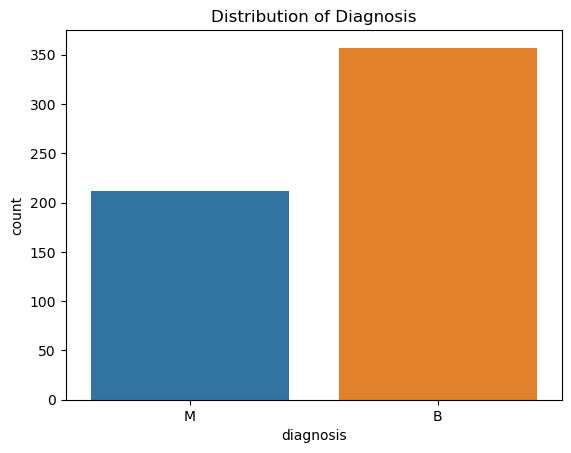

In [7]:
# Distribution of Diagnosis
sns.countplot(x='diagnosis',data = df)
plt.title("Distribution of Diagnosis")
plt.show()

In [8]:
# Label Encoding
LE = LabelEncoder()
df['diagnosis'] = LE.fit_transform(df['diagnosis'])
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
# Drop unimportant columns
df.drop(['id'], axis=1, inplace = True)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Visualization

C:\Users\Tony\AppData\Local\Temp\ipykernel_17380\3591479752.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(4, 2.5))


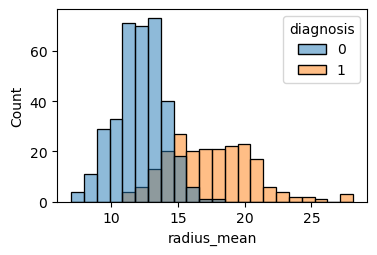

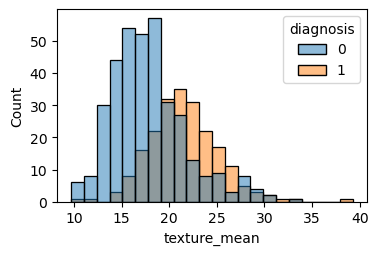

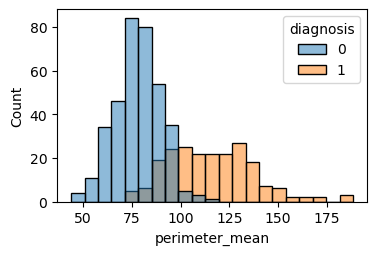

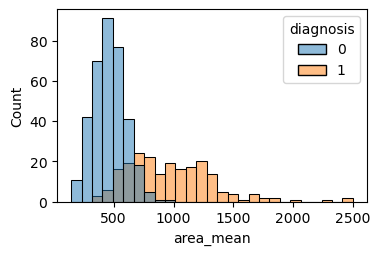

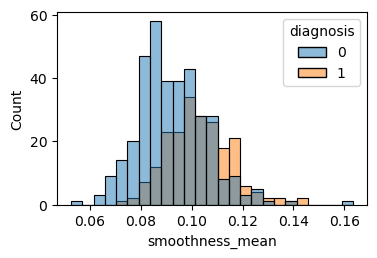

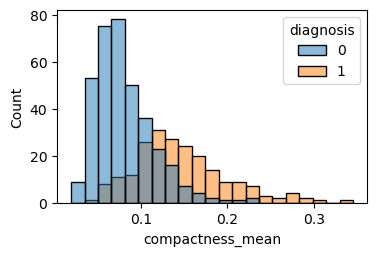

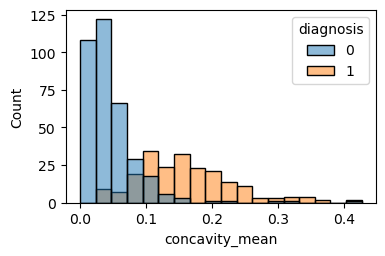

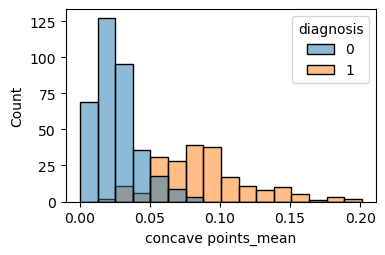

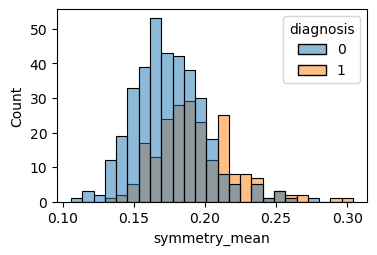

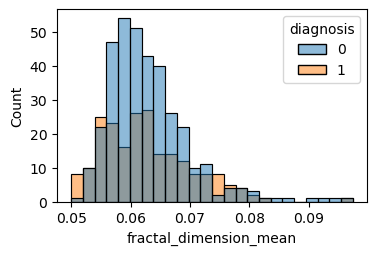

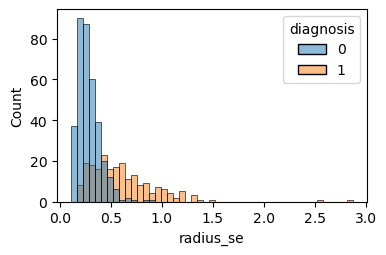

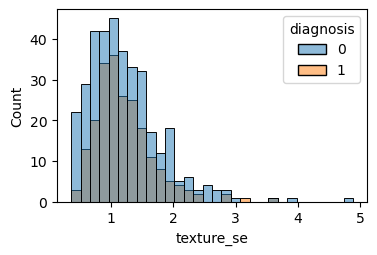

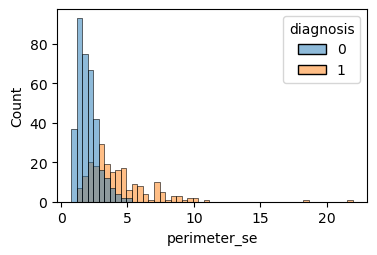

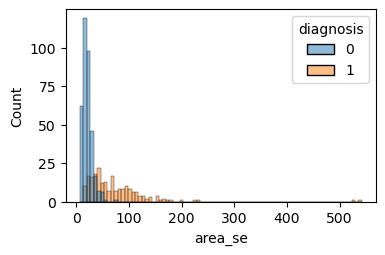

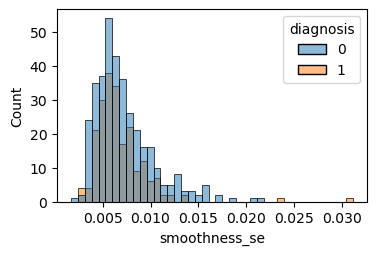

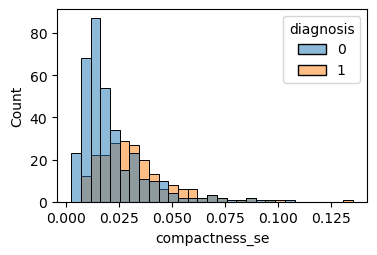

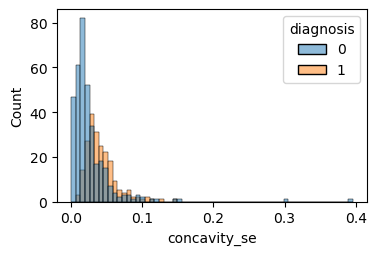

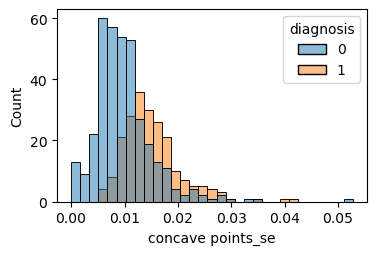

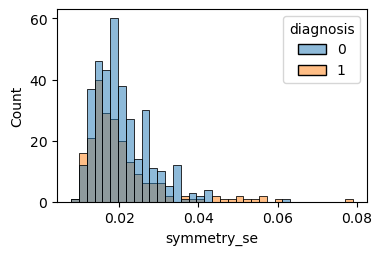

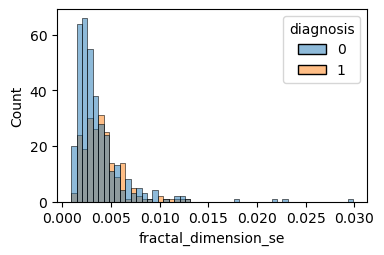

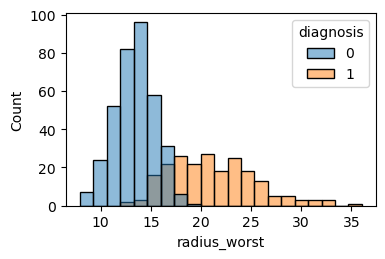

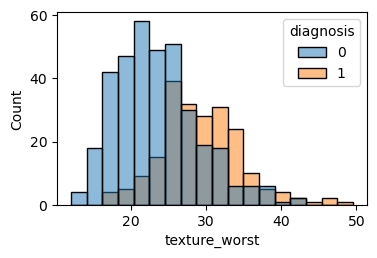

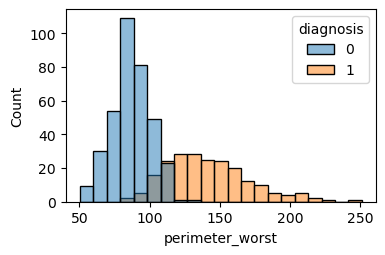

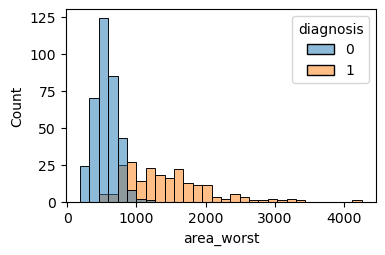

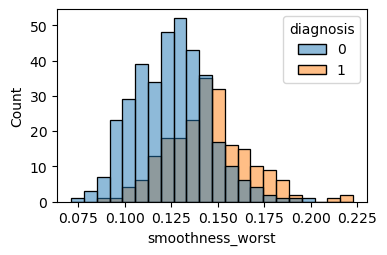

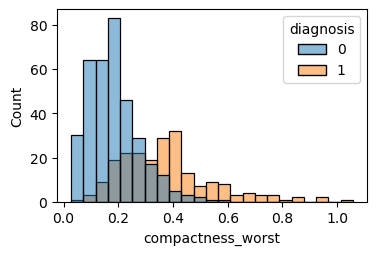

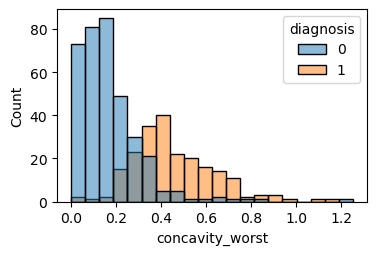

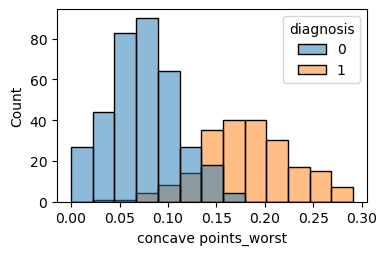

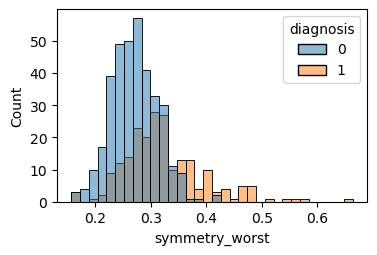

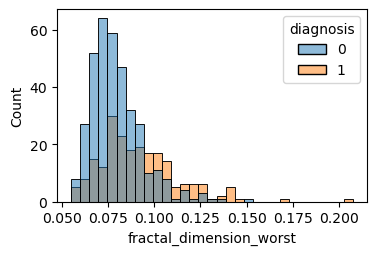

In [10]:
# plotting variation of all variables in the data against diagnosis
columns = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
for column in columns:
    plt.figure(figsize=(4, 2.5))
    sns.histplot(data=df, x=column, hue='diagnosis')

# Modeling

In [11]:
# Splitting for X and Y variables
Y = df['diagnosis']
X = df.drop(['diagnosis'], axis=1)

In [12]:
# Splitting dataset into 70% Training and 30% Testing Data

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size = 0.7, random_state = 0)

# Check the dimensions of the train & test subsets

print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is:", X_test.shape)

print('')
print("The shape of Y_train is:", Y_train.shape)
print("The shape of Y_test is:", Y_test.shape)

The shape of X_train is: (398, 30)
The shape of X_test is: (171, 30)

The shape of Y_train is: (398,)
The shape of Y_test is: (171,)


## Decision Tree

In [13]:
clf_dt = DecisionTreeClassifier(random_state=40)

#Train and predict using default tree paramters
clf_dt.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=40)

In [14]:
#returns the default training parameters for the classifier
clf_dt.get_params() 

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 40,
 'splitter': 'best'}

In [15]:
# predicting train and test data
Y_train_pred_dt = clf_dt.predict(X_train)
Y_test_pred_dt = clf_dt.predict(X_test)

In [16]:
# how did our model perform?
print('Accuracy Score on train data: ', metrics.accuracy_score(Y_train, Y_train_pred_dt))
print('Accuracy Score on test data: ', metrics.accuracy_score(Y_test, Y_test_pred_dt))
print('Misclassified samples: ', (Y_test != Y_test_pred_dt).sum())
print('Precision Score', metrics.precision_score(Y_test,Y_test_pred_dt))
print('Recall Score', metrics.recall_score(Y_test, Y_test_pred_dt))
print('F1 Score', metrics.f1_score(Y_test, Y_test_pred_dt))

Accuracy Score on train data:  1.0
Accuracy Score on test data:  0.9239766081871345
Misclassified samples:  13
Precision Score 0.8571428571428571
Recall Score 0.9523809523809523
F1 Score 0.9022556390977443


## Random Forest 

In [17]:
clf_rf = RandomForestClassifier(random_state=40)

#Train the model using the training sets
clf_rf.fit(X_train,Y_train)

RandomForestClassifier(random_state=40)

In [18]:
#returns the default training parameters for the classifier
clf_rf.get_params() 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 40,
 'verbose': 0,
 'warm_start': False}

In [19]:
Y_train_pred_rf = clf_rf.predict(X_train)
Y_test_pred_rf = clf_rf.predict(X_test)

In [20]:
# how did our model perform?
print('Accuracy Score on train data: ', metrics.accuracy_score(Y_train, Y_train_pred_rf))
print('Accuracy Score on test data: ', metrics.accuracy_score(Y_test, Y_test_pred_rf))
print('Misclassified samples: ', (Y_test != Y_test_pred_rf).sum())
print('Precision Score', metrics.precision_score(Y_test,Y_test_pred_rf))
print('Recall Score', metrics.recall_score(Y_test, Y_test_pred_rf))
print('F1 Score', metrics.f1_score(Y_test, Y_test_pred_rf))

Accuracy Score on train data:  1.0
Accuracy Score on test data:  0.9649122807017544
Misclassified samples:  6
Precision Score 0.9384615384615385
Recall Score 0.9682539682539683
F1 Score 0.953125


## Logistic Regression

In [21]:
clf_lr = LogisticRegression()

#Train the model using the training sets
clf_lr.fit(X_train,Y_train)

C:\Users\Tony\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
#returns the default training parameters for the classifier
clf_lr.get_params() 

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [23]:
Y_train_pred_lr = clf_lr.predict(X_train)
Y_test_pred_lr = clf_lr.predict(X_test)

In [24]:
# how did our model perform?
print('Accuracy Score on train data: ', metrics.accuracy_score(Y_train, Y_train_pred_lr))
print('Accuracy Score on test data: ', metrics.accuracy_score(Y_test, Y_test_pred_lr))
print('Misclassified samples: ', (Y_test != Y_test_pred_lr).sum())
print('Precision Score', metrics.precision_score(Y_test,Y_test_pred_lr))
print('Recall Score', metrics.recall_score(Y_test, Y_test_pred_lr))
print('F1 Score', metrics.f1_score(Y_test, Y_test_pred_lr))

Accuracy Score on train data:  0.9447236180904522
Accuracy Score on test data:  0.9532163742690059
Misclassified samples:  8
Precision Score 0.9104477611940298
Recall Score 0.9682539682539683
F1 Score 0.9384615384615386


## Naive Bayes

In [25]:
clf_nb = GaussianNB()

#Train the model using the training sets
clf_nb.fit(X_train,Y_train)

GaussianNB()

In [26]:
#returns the default training parameters for the classifier
clf_nb.get_params() 

{'priors': None, 'var_smoothing': 1e-09}

In [27]:
Y_train_pred_nb = clf_nb.predict(X_train)
Y_test_pred_nb = clf_nb.predict(X_test)

In [28]:
# how did our model perform?
print('Accuracy Score on train data: ', metrics.accuracy_score(Y_train, Y_train_pred_nb))
print('Accuracy Score on test data: ', metrics.accuracy_score(Y_test, Y_test_pred_nb))
print('Misclassified samples: ', (Y_test != Y_test_pred_nb).sum())
print('Precision Score', metrics.precision_score(Y_test,Y_test_pred_nb))
print('Recall Score', metrics.recall_score(Y_test, Y_test_pred_nb))
print('F1 Score', metrics.f1_score(Y_test, Y_test_pred_nb))

Accuracy Score on train data:  0.9422110552763819
Accuracy Score on test data:  0.9239766081871345
Misclassified samples:  13
Precision Score 0.890625
Recall Score 0.9047619047619048
F1 Score 0.8976377952755906


# Results

In [29]:
# comparison
accuracy_RF = '{:.1f}'.format(np.round((metrics.accuracy_score(Y_test, Y_test_pred_rf)*100),1))
accuracy_DT = '{:.1f}'.format(np.round((metrics.accuracy_score(Y_test, Y_test_pred_dt)*100),1))
accuracy_LR = '{:.1f}'.format(np.round((metrics.accuracy_score(Y_test, Y_test_pred_lr)*100),1))
accuracy_NB = '{:.1f}'.format(np.round((metrics.accuracy_score(Y_test, Y_test_pred_nb)*100),1))
table=pd.DataFrame({"Accuracy":[accuracy_RF,accuracy_LR,accuracy_DT,accuracy_NB]},
                   index=["Random Forest","Logistic Regression", "Decision Tree","Naive Bayes"])
table

,Accuracy
Random Forest,96.5
Logistic Regression,95.3
Decision Tree,92.4
Naive Bayes,92.4


### The best model according to the accuracy is the Random Forest Classifier with 96.5% 